# Statistik-Labor Testat Aufgabe 4
***Hinweise:***
- Bitte überprüfen Sie Ihre Resultate vor der Abgabe Ihre Ergebnisse mit den Teilergebnissen aus der Datei ***Teilergebnisse_xy.txt***.
- Die Unterlagen sind im **pdf-Format** in Moodle hochgeladen abzugeben. Richtige Lösungen werden nicht mehr an Sie zurückgegeben. Eine Abgabe per Email ist nicht möglich.
- Bitte füllen Sie das jeweilige **Deckblatt** mit aus und geben es mit Ihrer Lösung zusammen ab.

***Aufgabenstellung:***<br>
In den Dateien **sr_aufg_4_xy_MR1.txt**, **sr_aufg_4_xy_MR 2.txt** und **sr_aufg_4_xy_MR3.txt**
(*xy = Endziffern Ihrer Matrikelnummer*) finden Sie drei verschiedene Messreihen.<br> 
Es soll jeweils untersucht werden, ob bei der Messreihe eine Normalverteilung vorliegt und falls ja, welche Normalverteilung in Frage kommt.

## 1. Daten einlesen
Lesen Sie Daten in **Python** bzw. ein **Jupyter Notebook** ein.

In [62]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('datasets/sr_aufg_4_13_MR1.txt', delim_whitespace=True, decimal=',', header=None, names=['MR1'])

data

,MR1
0,45.1970
1,45.0110
2,45.1998
3,45.1715
4,45.0518
...,...
95,45.1491
96,45.0021
97,45.8113
98,45.3871


In [63]:
data2 = pd.read_csv('datasets/sr_aufg_4_13_MR2.txt', delim_whitespace=True, decimal=',', header=None, names=['MR2'])
data2

,MR2
0,6.6440
1,4.2810
2,9.8029
3,9.7013
4,4.0022
...,...
95,4.4331
96,9.7703
97,8.2878
98,9.9009


In [64]:
data3 = pd.read_csv('datasets/sr_aufg_4_13_MR3.txt', delim_whitespace=True, decimal=',', header=None, names=['MR3'])
data3


,MR3
0,321.5564
1,322.4418
2,323.4318
3,323.6125
4,325.0690
...,...
95,324.5424
96,322.7310
97,327.4347
98,325.4622


## 2. Kennzahlen bestimmen
Berechnen Sie für jeden der drei Messreihen **Mittelwert**, **empirische Varianz**, **empirische Standardabweichung**, **Median** und **Spannweite**.

***Beispiellösung:***<br>
Bitte geben Sie die Kennzahlen in tabellarischer Form ab.

In [65]:
import numpy as np

# function to be able to handle all datasets
def calculate_statistics(data):
    mean = data.mean()
    variance = data.var(ddof=1)
    std_dev = data.std(ddof=1)
    median = data.median()
    range_val = data.max() - data.min()
    return mean, variance, std_dev, median, range_val

# Calculate statistics for each dataset
mean1, variance1, std_dev1, median1, range1 = calculate_statistics(data['MR1'])
mean2, variance2, std_dev2, median2, range2 = calculate_statistics(data2['MR2'])
mean3, variance3, std_dev3, median3, range3 = calculate_statistics(data3['MR3'])

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Datenreihe': ['MR1', 'MR2', 'MR3'],
    'Mittelwert': [mean1.round(4), mean2.round(4), mean3.round(4)],
    'Varianz': [variance1.round(4), variance2.round(4), variance3.round(4)],
    'Standardabweichung': [std_dev1.round(4), std_dev2.round(4), std_dev3.round(4)],
    'Median': [median1.round(4), median2.round(4), median3.round(4)],
    'Spannweite': [range1.round(4), range2.round(4), range3.round(4)]
})

results

,Datenreihe,Mittelwert,Varianz,Standardabweichung,Median,Spannweite
0,MR1,45.3826,0.1400,0.3741,45.2684,1.9929
1,MR2,7.0542,5.4872,2.3425,7.3000,5.9523
2,MR3,322.8829,4.1343,2.0333,322.9652,9.8042


## 3. Histogramme erstellen
Erstellen Sie für jeden der drei Messreihen ein Histogramm. <br>
Erläutern Sie hierzu auch die Wahl der Klassen: 
- Wie viele Klassen haben Sie gewählt (und warum diese Anzahl von Klassen)? 
- Wie haben Sie die Klassengrenzen festgelegt und warum? Welche Funktion haben Sie beim Auszählen benutzt?

***Beispiellösung:***<br>
Darstellung aller 3 Histogramme mit zusätzlich der Beantwortung der Fragen.

## Erläuterung zu 3.
Anzahl der Klassen: Wurzel n wobei n die Anzahl der Messwerte ist. (Kapitel 3.2.2 im Skript)
Klassengrenzen: Gleichmäßig zwischen dem Minimum und Maximum der Daten verteilt, um eine gleichmäßige Verteilung der Datenpunkte über die Klassen hinweg zu gewährleisten.
Über hist-Funktion von Matplotlib wurden die Daten in die Klassen eingeteilt und die Häufigkeit ausgezählt


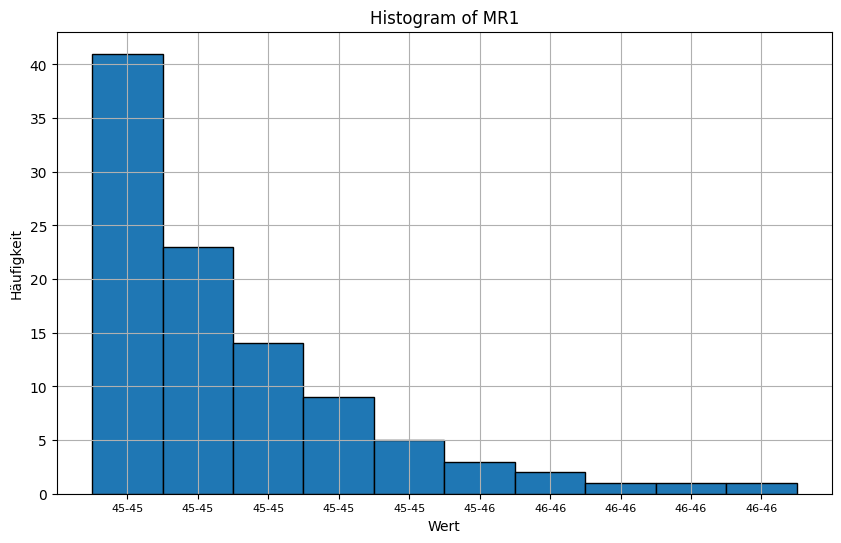

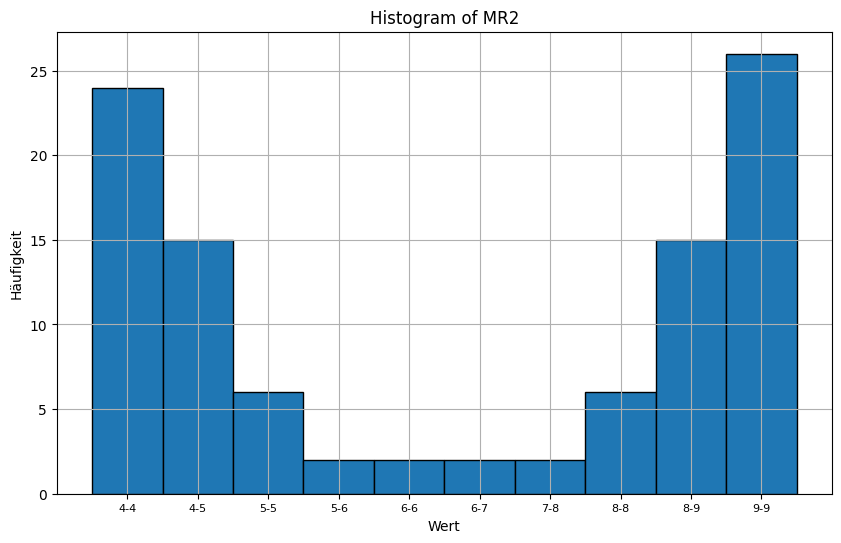

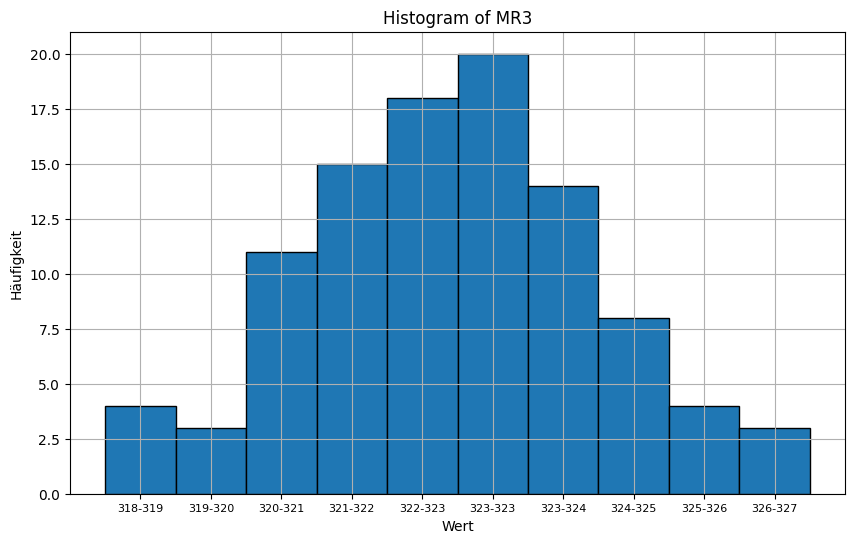

In [66]:
import matplotlib.pyplot as plt
# function to plot histogrammen including class description
def plot_histogram_with_class_labels(data, title):
    # square root rule for number of classes
    bins = int(np.ceil(np.sqrt(len(data))))
    
    counts, bin_edges = np.histogram(data, bins=bins)
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=bins, edgecolor='black')
    plt.title(f'Histogram of {title}')
    plt.xlabel('Wert')
    plt.ylabel('Häufigkeit')
    plt.grid(True)
    
    # description for each class (bottom, range)
    bin_labels = [f'{int(bin_edges[i])}-{int(bin_edges[i+1])}' for i in range(bins)]
    plt.xticks(ticks=(bin_edges[:-1] + bin_edges[1:]) / 2, labels=bin_labels, rotation=0, fontsize=8)
    
    plt.show()

# plot it
plot_histogram_with_class_labels(data['MR1'], 'MR1')
plot_histogram_with_class_labels(data2['MR2'], 'MR2')
plot_histogram_with_class_labels(data3['MR3'], 'MR3')



## 4. Normalverteilte Daten erkennen
Entscheiden Sie anhand des Histogramms für jede der drei Messreihen, ob eine Normalverteilung vorliegt. Begründen Sie Ihre Entscheidung.

## Für MR1->Keine Normalverteilung: Keine Symmetrie, keine Glockenform
## Für MR2->Keine Normalverteilung: keine Glockenform
## Für MR3->Normalverteilung: Symmetrie, Glockenform


## 5. Dichtekurve der Normalverteilung einzeichnen
Sofern bei einer Messreihe eine Normalverteilung vorliegt, erstellen Sie ein weiteres Diagramm, das sowohl das Histogramm als auch die (an das Histogramm angepasste) Dichtekurve der passenden Normalverteilung zeigt.
- Welche Normalverteilungsdichte haben Sie gezeichnet, d. h., welche Werte haben Sie für die Parameter $\mu$ bzw. $\sigma$ eingesetzt?

***Beispiellösung*** (für den Fall, dass bei Messreihe MR1 eine Normalverteilung vorliegt):
<div>
<img src="https://drive.google.com/uc?id=1iVJQvjVW9mvBWJ_V3a4rUMJ-fdgbzqg4" width="500"/>
</div>

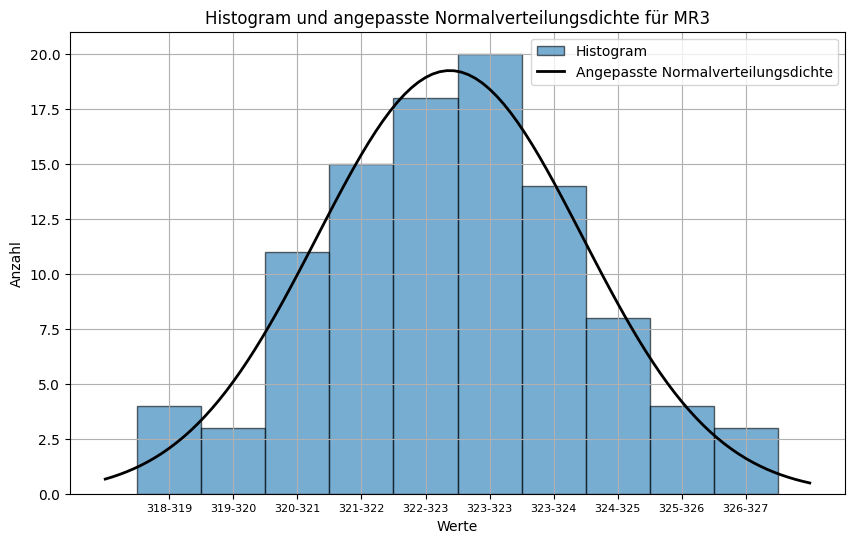

In [68]:
from scipy.stats import norm
# function from above including NV
def plot_histogram_with_class_labels_and_normal_distribution(data, title):
    # Wurzel-Regel zur Bestimmung der Klassenanzahl
    bins = int(np.ceil(np.sqrt(len(data))))
    
    counts, bin_edges = np.histogram(data, bins=bins, density=False)
    
    # Berechne Mittelwert und Standardabweichung der Messreihe
    mean = data.mean()
    std_dev = data.std()
    
    plt.figure(figsize=(10, 6))
    # Histogramm 
    plt.hist(data, bins=bins, edgecolor='black', alpha=0.6, label='Histogram')
    
    # Plot angepasste Normalverteilungsdichte
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std_dev)
    # Skalieren der Dichte entsprechend der Anzahl der Beobachtungen (damit y-Achse nach wie vor die Anzahl zeigt)
    scaling_factor = len(data) * (bin_edges[1] - bin_edges[0])
    plt.plot(x, p * scaling_factor, 'k', linewidth=2, label='Angepasste Normalverteilungsdichte')
    
        # description for each class (bottom, range)
    bin_labels = [f'{int(bin_edges[i])}-{int(bin_edges[i+1])}' for i in range(bins)]
    plt.xticks(ticks=(bin_edges[:-1] + bin_edges[1:]) / 2, labels=bin_labels, rotation=0, fontsize=8)
    
    plt.title(f'Histogram und angepasste Normalverteilungsdichte für {title}')
    plt.xlabel('Werte')
    plt.ylabel('Anzahl')
    plt.grid(True)
    plt.legend()
    plt.show()

# Histogramm plotten 
plot_histogram_with_class_labels_and_normal_distribution(data3['MR3'], 'MR3')

warnings.filterwarnings("ignore")

## 6. Erläuterungen zur Dichtekurve
Erläutern Sie zu dem bei 5. gezeichneten Diagramm:
- Um welchen Faktor unterscheiden sich die im Histogramm dargestellten Anzahlen von den Funktionswerten der Normalverteilungsdichte?
- Wie haben Sie diesen Faktor bei der Erstellung des Diagramms berücksichtigt? Mussten Sie die Skalierung der y-Achse(n) ändern? Wenn ja, wie? Wenn nein, warum nicht?

## Erläuterung
